In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

0


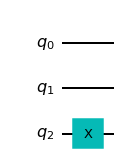

In [3]:
# import basic plot tools
from qiskit.visualization import plot_histogram

# set the length of the n-bit input string. 
n = 2

const_oracle = QuantumCircuit(n+1)

# a random number between 0 and 1
output = np.random.randint(2)
print(output)
if output == 1 or output == 0:
    const_oracle.x(n)

const_oracle.draw()

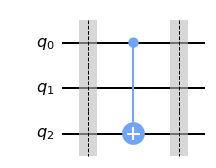

In [4]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "0"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

#balanced_oracle.x(1)
# Controlled-NOT gates
#for qubit in range(n):
#    balanced_oracle.cx(qubit, n)
#balanced_oracle.x(1)  
#balanced_oracle.barrier()

balanced_oracle.cx(0,2)
balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

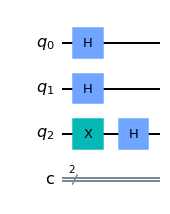

In [5]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

/tmp/ipykernel_59/996962508.py:2: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += const_oracle
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


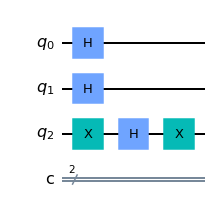

In [6]:
# Add oracle
dj_circuit += const_oracle
dj_circuit.draw()

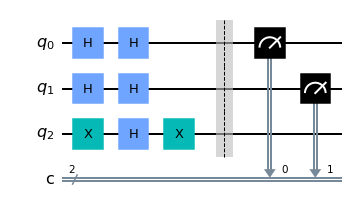

In [7]:
# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()
# Measure
for i in range(n):
    dj_circuit.measure(i, i)
dj_circuit.draw()

In [8]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(dj_circuit)
result = job.result()
job.result().get_counts()

{'00': 1}

In [9]:
from qiskit.providers.ibmq import least_busy
provider = IBMQ.get_provider(hub='ibm-q')
print(provider.backends())
#backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
#                                   not x.configuration().simulator and x.status().operational==True))
#print("least busy backend: ", backend)
backend = provider.get_backend('ibmq_bogota')

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') fro

In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job is queued (1)     

In [ ]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()
plot_histogram(answer)